# Introductory Machine Learning Pipeline (Regression)

Regression tasks are tasks where the ultimate goal of the model is to return a numeric value by making a prediction. 

**Objective:** As an example, in this case we will do a regression to calculate the covid cases that will occur in future weeks based on the data of past weeks and the current week.

**Pipeline:** As a pipeline for machine learning tasks, we will be following the instructions based on <a href="https://www.ibm.com/docs/es/spss-modeler/saas?topic=dm-crisp-help-overview">CRISP-DM</a> methodology:

<img src="https://www.ibm.com/docs/es/SS3RA7_sub/modeler_crispdm_ddita/clementine/images/crisp_process.jpg" alt="Crisp dm methodology" width="250"/>


1. **Business Understanding**: First, we must understand that data science and therefore machine learning are techniques that require an understanding of the problem and the formation of multidisciplinary teams. That is why this initial phase is crucial for the success of any project in data science. In this phase we will be in charge of obtaining all the possible information about the project, this implies:

- Domain of the problem
- Related works
- Business objectives
- Possible data sources
- Success criterial of the project
- Possible solutions and techinques

2. **Data Understanding**: The second phase is the data understanding phase. In this phase we will assume that we have already passed through the data collection stage. In this phase we will take care of understanding the data we have available and its possible use to solve the problem. In this phase, the data is:
- Analyzed by visualizing the dataset, shape, variables, ...
- Genearating different statistics from the dataset, like mean, min, max, sd
- And generating plots from the datasets.

3. **Data Preparation**: Once we have analyzed the data, we know what the strengths and weaknesses of the dataset are, therefore we must move on to a data preparation phase, which consists of:
- Data cleaning
- Variable selection
- Format changes
- Data imputation

4. **Modeling**: The modeling stage consists of the generation of multiple machine learning and statistical models designed to solve the specific task using the data collected in the previous phases. In this phase, the models are also evaluated by testing the models generated under a previously defined metric and it is seen which model has the best performance.

5. **Evaluation**: Once the modeling phase has been completed, starts the evaluation phase, where unlike the previous phase, not only the model is evaluated, but also the business objectives defined in the first phase and if the models generated truth fulfills the objective of the project.

**Note**: The phases of this methodology are not static, once a phase is completed you can come back to that phase again if it's necessary. Follow the rows of the previous image as reference. 

# 1. Business Understanding

The pandemic caused by covid-19 has shown that both governments and health institutions are not prepared for a health crisis on the level of the pandemic caused by covid-19.

However, the crisis has also brought different solutions and ways to deal with the pandemic using data science and machine learning techniques. Some examples of this is the creation of early warning systems that help health entities to propose strategies for the preparation and management of the pandemic and hospital resources.

For the creation of these models, many types of data and models can be used, such as autoregressive models that use data from the same disease in past days or weeks to predict future behavior, for which they can be used from traditional statistical techniques of analysis of time series (such as ARIMA or SARIMA), machine learning techniques using regression models (such as linear regression, random forest, Support Vector Regressor (SVR), etc.) or more advanced techniques such as deep learning for sequence analysis (Recurrent Neural Networks , Long-Short Termn-Memory (LSTM), Transformers, among others) [<a href="https://link.springer.com/article/10.1007/s13204-021-01868-7">1</a>, <a href="https://link.springer.com/article/10.1007/s42979-021-00774-7">2</a>].

Likewise, the possibility of using various data sources that can help in the construction of these models, making use of data such as those obtained by public and open sources such as newspapers, news, Google searches, among others, have proven to be effective in disease prediction [<a href="https://arxiv.org/abs/2004.04019">3</a>].

### Setup enviorment

In [1]:
# Data reading in Dataframe format and data preprocessing
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Linear algebra operations
import numpy as np

# Machine learning models and preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# Deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 2. Data Understanding

In this practice we will be using 2 datasets:

1. COVID-19 Cases in latam
2. COVID-19 mentions in news from Media Cloud

### For both datasets we will do the following:

1. Analying the original dataset (shape, variables, etc.)
2. Genearating different statistics from the dataset (mean, min, max, sd)
3. Data visualization using some plots.

In [3]:
""" 
This function checks if there are null values in the dataframe:
In case of not having null values, print: 'There aren't null values in the dataframe'
In case of having null values, print the columns with these values
"""
def null_values(df):
    nulos = df.isna().sum().any()
    if nulos == False:
        print("There aren't null values in the dataframe")
    else:
        print(df.isna().sum()[df.isna().sum() == True])

### 2.1 COVID-19 Cases in latam

We can see that the file _"daily_covid_cases_latam.csv"_ has:

Columns:
- Location: Name of the country where covid-19 cases occured
- Dates from 2020-02-23 to 2022-05-26: Number of covid-19 cases in that day im that in each country

Rows:
- Each row is a different country

In [4]:
# Path to file
file_path = 'COVID_LATAM/Output/daily_covid_cases_latam.csv'

# Read file
covid_cases_latam = pd.read_csv(file_path)

# Check if there are null values
null_values(covid_cases_latam)

# Print first 5 rows
covid_cases_latam.head()

There aren't null values in the dataframe


,location,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,...,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26
0,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,607.730,557.086,0.000,324.123,0.000,405.154,0.000,810.307,577.344
1,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,953.541,0.000,0.000,0.000,0.000
2,Bahamas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.622,55.428,123.452,221.710,161.244,156.205,73.064,131.011,0.000,317.449
3,Barbados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1630.125,1400.726,1289.502,1077.481,0.000,1637.076,451.847,1160.899,851.558,806.373
4,Belize,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,264.253,197.572,288.950,214.860,0.000,0.000,488.992,325.994,306.237,187.694


In [5]:
# Check data types
covid_cases_latam.dtypes

location       object
2020-02-23    float64
2020-02-24    float64
2020-02-25    float64
2020-02-26    float64
               ...   
2022-05-22    float64
2022-05-23    float64
2022-05-24    float64
2022-05-25    float64
2022-05-26    float64
Length: 825, dtype: object

In [6]:
# Describe the dataset
covid_cases_latam.describe()

,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,...,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26
count,32.000000,32.0,32.0,32.000000,32.0,32.000000,32.000000,32.000000,32.0,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.003250,0.0,0.0,0.000156,0.0,0.000250,0.000875,0.024938,0.0,0.004063,...,250.273531,281.243375,208.875125,158.458031,64.220562,174.703156,371.740000,348.417969,365.373031,156.078937
std,0.018385,0.0,0.0,0.000884,0.0,0.001414,0.004133,0.086726,0.0,0.013673,...,563.174421,561.821531,359.397654,269.361214,158.757000,356.878452,1549.621268,661.917481,1072.473840,251.322430
min,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,7.483500,1.045000,29.356000,13.097000,0.000000,3.285000,5.546000,36.451500,19.141500,31.611500
75%,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,157.281000,215.024000,307.006000,216.572500,13.788000,178.612750,109.775500,317.413250,276.969000,154.770500
max,0.104000,0.0,0.0,0.005000,0.0,0.008000,0.023000,0.364000,0.0,0.056000,...,2406.760000,2212.275000,1289.502000,1077.481000,731.014000,1637.076000,8812.282000,2627.916000,5985.701000,901.729000


## 2.2 COVID-19 mentions in news from Media Cloud

We can see that the file _"covid-19_attention_latam.csv"_ has:

Columns:

- date: Dates from 2020-01-01 to 2022-06-01 when the mentions of covid-19 occured
- count_Country Name: Represents the number of news media mentioning our topic.
- total_count_Country Name: Is the total number of news media published.
- ratio_Country Name: Indicates the proportion of news media that contain the word we are interested in.

Rows:
- Each row is a different date

In [7]:
# Path to file
file_path = 'Media_Cloud_Data/Attention _COVID-19_National/covid-19_attention_latam.csv'

# Read file
covid_media_cloud_latam = pd.read_csv(file_path)

# Convert date to datetime datatype
covid_media_cloud_latam.date = pd.to_datetime(covid_media_cloud_latam.date)

# Check if there are null values
null_values(covid_media_cloud_latam)

# Print first 5 rows
covid_media_cloud_latam.head()

There aren't null values in the dataframe


,date,count_Antigua and Barbuda,total_count_Antigua and Barbuda,ratio_Antigua and Barbuda,count_Argentina,total_count_Argentina,ratio_Argentina,count_Bahamas,total_count_Bahamas,ratio_Bahamas,...,ratio_Suriname,count_Trinidad and Tobago,total_count_Trinidad and Tobago,ratio_Trinidad and Tobago,count_Uruguay,total_count_Uruguay,ratio_Uruguay,count_Venezuela,total_count_Venezuela,ratio_Venezuela
0,2020-01-01,0,3,0.000,180,2699,0.066691,0,12,0.000000,...,0.058824,2,25,0.080000,9,158,0.056962,9,464,0.019397
1,2020-01-02,0,6,0.000,528,6319,0.083558,0,51,0.000000,...,0.000000,0,28,0.000000,17,314,0.054140,45,678,0.066372
2,2020-01-03,1,10,0.100,465,7209,0.064503,3,60,0.050000,...,0.240000,4,29,0.137931,24,363,0.066116,45,897,0.050167
3,2020-01-04,0,7,0.000,268,3805,0.070434,1,39,0.025641,...,0.142857,1,14,0.071429,18,192,0.093750,18,659,0.027314
4,2020-01-05,1,8,0.125,292,3771,0.077433,2,34,0.058824,...,0.222222,3,27,0.111111,18,203,0.088670,31,773,0.040103


In [8]:
# Check data types
covid_media_cloud_latam.dtypes

date                               datetime64[ns]
count_Antigua and Barbuda                   int64
total_count_Antigua and Barbuda             int64
ratio_Antigua and Barbuda                 float64
count_Argentina                             int64
                                        ...      
total_count_Uruguay                         int64
ratio_Uruguay                             float64
count_Venezuela                             int64
total_count_Venezuela                       int64
ratio_Venezuela                           float64
Length: 97, dtype: object

In [9]:
# Describe the dataset
covid_media_cloud_latam.describe()

,count_Antigua and Barbuda,total_count_Antigua and Barbuda,ratio_Antigua and Barbuda,count_Argentina,total_count_Argentina,ratio_Argentina,count_Bahamas,total_count_Bahamas,ratio_Bahamas,count_Barbados,...,ratio_Suriname,count_Trinidad and Tobago,total_count_Trinidad and Tobago,ratio_Trinidad and Tobago,count_Uruguay,total_count_Uruguay,ratio_Uruguay,count_Venezuela,total_count_Venezuela,ratio_Venezuela
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,...,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,8.817667,25.439411,0.332739,3163.884485,15558.562854,0.204927,26.937712,66.570781,0.388500,29.322763,...,0.272125,16.139298,78.983012,0.198213,115.952435,501.975085,0.232075,449.425821,1818.894677,0.252100
std,7.309457,17.955397,0.185969,1633.061302,7233.601749,0.067675,18.704334,35.920016,0.186629,15.676759,...,0.133356,10.318063,42.974848,0.099302,57.607791,197.927904,0.086026,234.978973,714.666883,0.128710
min,0.000000,0.000000,0.000000,23.000000,114.000000,0.047554,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,12.000000,0.214286,2151.000000,10711.500000,0.154281,10.000000,42.000000,0.259437,20.000000,...,0.189636,7.000000,42.000000,0.138525,82.000000,369.000000,0.174887,284.500000,1386.500000,0.167517
50%,7.000000,21.000000,0.333333,3203.000000,14681.000000,0.211622,25.000000,65.000000,0.393443,29.000000,...,0.260000,16.000000,79.000000,0.192771,115.000000,484.000000,0.228938,460.000000,1861.000000,0.248048
75%,13.000000,35.500000,0.444444,4311.500000,21503.500000,0.252008,40.000000,88.000000,0.520157,39.000000,...,0.347467,23.000000,109.500000,0.253745,150.000000,688.000000,0.291356,635.000000,2443.500000,0.323386
max,41.000000,87.000000,1.000000,9292.000000,29055.000000,0.413718,86.000000,224.000000,1.000000,82.000000,...,1.000000,49.000000,209.000000,1.000000,305.000000,857.000000,0.750000,1131.000000,3128.000000,1.000000


In [10]:
"""
Function to show histograms of the ratio of 3 countries

1. You must pass the list of the names of the 3 countries as they appear in the dataset after ratio_ ...
Example:
ratio_Antigua and Barbuda -> Antigua and Barbuda
ratio_Argentina -> Argentina
ratio_Bahamas -> Bahamas

2. With those names you form a list like this:
-> countries = ['Antigua and Barbuda', 'Argentina', 'Bahamas']

3. You call the function like this:
where df is the dataframe with the country data
show_histograms(df, countries)

Optional:
you can change the color by putting a color between the parentheses, like this:
-> show_histograms(countries, color='#fcba03')

In this case the color is '#fcba03', but you can also use the name, like:
-> show_histograms(countries, color='Blue')
"""

def mostrar_histogramas(df, paises, color='#fcba03'):

    plt.gcf().set_size_inches(15, 8)
    plt.subplot(1, 3, 1)

    sns.distplot(df[f'ratio_{paises[0]}'], bins=20, color=color)
    plt.title(f'RSV  {paises[0]}')

    plt.subplot(1, 3, 2)
    sns.distplot(df[f'ratio_{paises[1]}'], bins=20, color=color)
    plt.title(f'RSV  {paises[1]}')

    plt.subplot(1, 3, 3)
    sns.distplot(df[f'ratio_{paises[2]}'], bins=20, color=color)
    plt.title(f'RSV  {paises[2]}')

    plt.show()

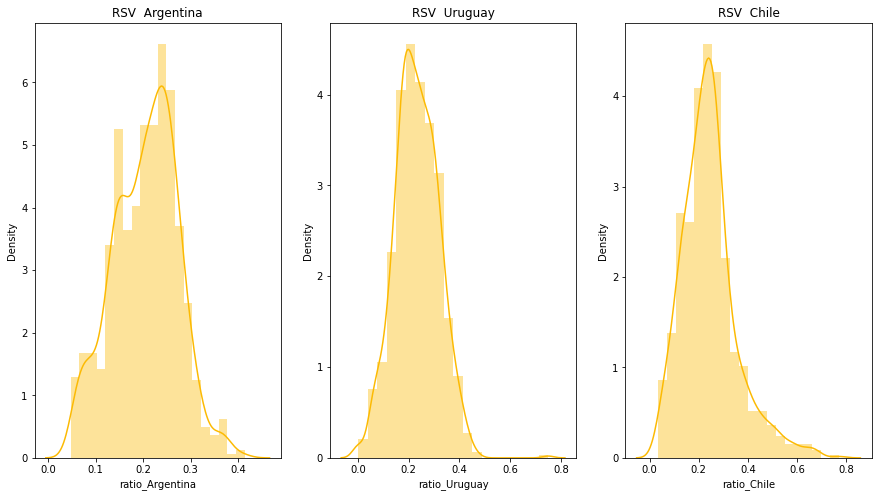

In [11]:
# We use the function to show the ratio of Argentina, Uruguay and Chile
paises = ['Argentina', 'Uruguay', 'Chile']
# Call the function using the list
mostrar_histogramas(covid_media_cloud_latam, paises)

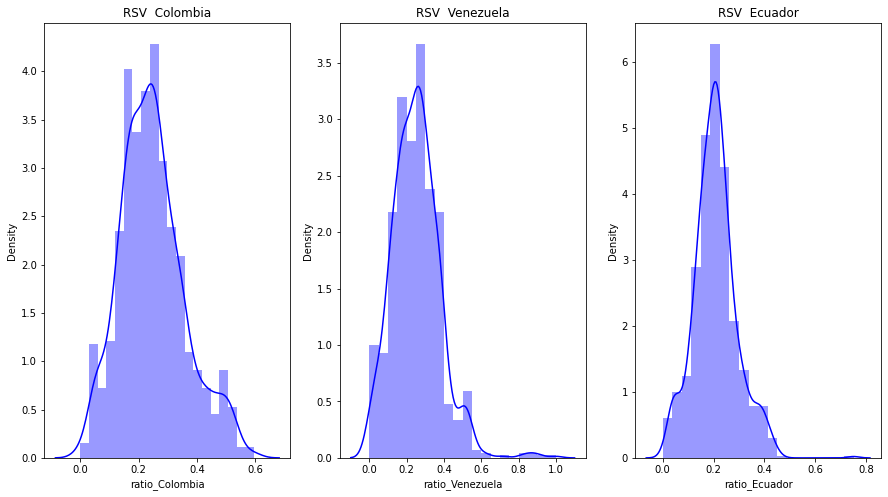

In [12]:
paises = ['Colombia', 'Venezuela', 'Ecuador']
mostrar_histogramas(covid_media_cloud_latam, paises, color= 'Blue')

# 3. Data Preparation

## 3.1. Data Selection for Colombia

As we have many countries in the dataset, for simplicity we will do this exercise only for the Colombian data

### 3.1.1. COVID Cases in Colombia

In [13]:
""" 
Function to read the file with covid-19 cases in a specific location

You call the function like this:
read_csv_country(file_path, location)

- where file_path is the path of the file with covid-19 cases
- and location is the country name that we want to analyze
"""
def read_csv_country(file_path, location):
    df = pd.read_csv(file_path, index_col=0)
    df = df[df.index == location]
    df = df.T
    df.columns.name = None
    if 'weekly' not in file_path:
        df.index = pd.to_datetime(df.index)
    else:
        df.index = pd.to_numeric(df.index)
    df = df.reset_index()
    df = df.rename(columns={'index':'date', location:'Cases'})
    
    return df

In [14]:
""" 
Function to plot the time series of the country
"""
def plot_cases(df):
    plt.figure(figsize = (12, 8))
    plt.plot(df.date, df.Cases, color ='blue')
    plt.xlabel('Date') 
    plt.ylabel('Covid Cases')
    plt.show()

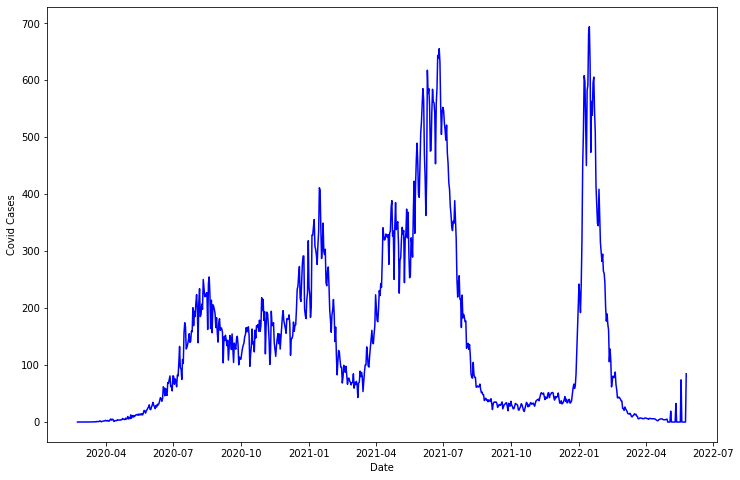

,date,Cases
0,2020-02-23,0.000
1,2020-02-24,0.000
2,2020-02-25,0.000
3,2020-02-26,0.000
4,2020-02-27,0.000
...,...,...
819,2022-05-22,0.000
820,2022-05-23,0.000
821,2022-05-24,0.000
822,2022-05-25,0.000


In [15]:
file_path = 'COVID_LATAM/Output/daily_covid_cases_latam.csv'
location = 'Colombia'

# Use the function with the filepath and location
covid_cases = read_csv_country(file_path, location)
plot_cases(covid_cases)
covid_cases

### 3.1.2. Media Cloud Data in Colombia

In [16]:
""" 
Function to read the media cloud file with covid-19 mentions in a specific location.

You call the function like this:
read_mediacloud_csv(media_cloud_file_path, location, filter_df=False, option=3)

where: 
- "media_cloud_file_path" is the path of the file with covid-19 mentions from media cloud
- "location" is the country name that we want to analyze
- "filter_df" is False if we want to get the 3 variables (Count, Total_Count and Ratio) of that country
- If "filter_df" is True; then the argument "option" deffines wich variable to get:
    - Option = 0, means that the function will return just the column "Count"
    - Option = 1, means that the function will return just the column "total_count"
    - Option == Any other value, means that the function will return just the column "ratio"
"""

def read_mediacloud_csv(media_cloud_file_path, location, filter_df=False, option=3):
    # Read file
    df = pd.read_csv(media_cloud_file_path)
    
    # Add column names
    column_names = [column for column in df.columns if location in column]
    column_names.insert(0, 'date')
    if not filter_df:
        print(f'The selected columns are : {column_names}')
    
    # Filter based on location
    df = df[column_names]
    
    name = ''
    if filter_df:
        if option == 0:
            var = 'count'
            name = 'Count'
        elif option == 1:
            var = 'total_count'
            name = 'Total Count'
        else:
            name = 'Ratio'
            var = 'ratio'
        
        var = var + '_' + location
        column_names = [column for column in df.columns if var == column]  
        column_names.insert(0, 'date')
        print(f'The selected columns are : {column_names}')
        df = df[column_names]

    df.date = pd.to_datetime(df.date)
    
    plot_media_cloud(df, name)
    plot_histogram_media_cloud(df, name)
    return df

In [21]:
# Plot time series of the media cloud dataframe
def plot_media_cloud(df, name):
    plt.figure(figsize = (15, 8))
    
    columns = df.columns
    
    if len(columns) > 2:
        plt.subplot(1, 3, 1)
        sns.lineplot(df.date, df[columns[1]], color ='Blue', label='Count')
        
        plt.subplot(1, 3, 2)
        sns.lineplot(df.date, df[columns[2]], color ='Purple', label='Total Count')
        
        plt.subplot(1, 3, 3)
        sns.lineplot(df.date, df[columns[3]], color ='Red', label='Ratio')
        
    else:
        sns.lineplot(df.date, df[columns[1]], color ='Purple', label=name)
        
        
    plt.xlabel('Date') 
    plt.ylabel('Meida Cloud Score')
    plt.legend()
    plt.show()

def plot_histogram_media_cloud(df, name):
    plt.figure(figsize = (12, 10))
    
    columns = df.columns
    
    if len(columns) > 2:
        
        plt.gcf().set_size_inches(15, 8)
        plt.subplot(1, 3, 1)
        sns.distplot(df[columns[1]], bins=20)
        
        plt.subplot(1, 3, 2)
        sns.distplot(df[columns[2]], bins=20)
        
        plt.subplot(1, 3, 3)
        sns.distplot(df[columns[3]], bins=20)
        
    else:
        sns.distplot(df[columns[1]], bins=20, color='Blue')
        
        
    plt.xlabel('Date') 
    plt.ylabel('Meida Cloud Score')
    plt.show()
    

The selected columns are : ['date', 'ratio_Colombia']


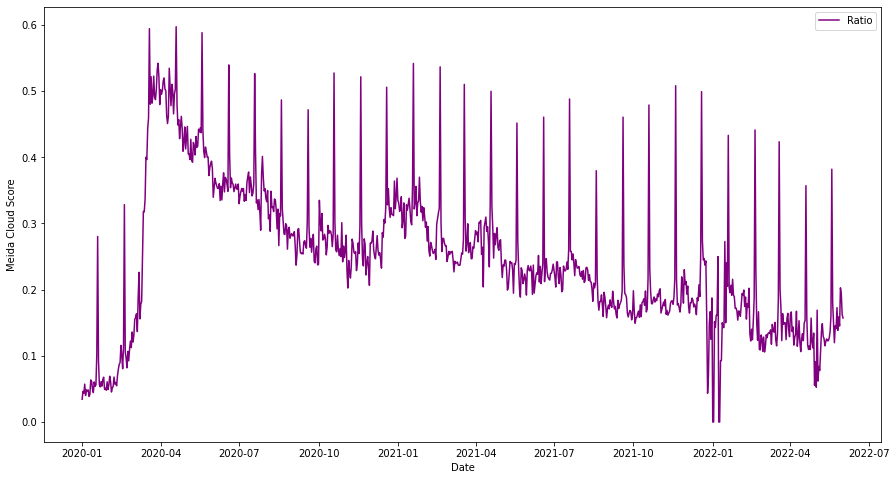

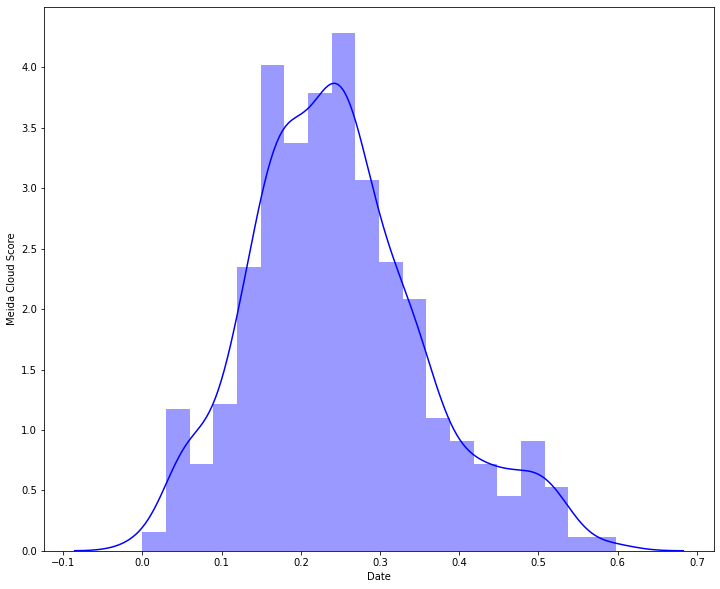

,date,ratio_Colombia
0,2020-01-01,0.034388
1,2020-01-02,0.046326
2,2020-01-03,0.043379
3,2020-01-04,0.057274
4,2020-01-05,0.040115
...,...,...
878,2022-05-28,0.145021
879,2022-05-29,0.202751
880,2022-05-30,0.193417
881,2022-05-31,0.162197


In [23]:
# Plot media cloud dataframe
media_cloud_file_path = 'Media_Cloud_Data/Attention _COVID-19_National/covid-19_attention_latam.csv'

mediaCloud = read_mediacloud_csv(media_cloud_file_path, location, filter_df=True, option=3)
mediaCloud

## 3.2. Data preparation

We have the data and variables that we want to use to fit the model, now we have to prepare the data

### 3.2.1. Merge Dataframes

In [24]:
# Merge the two dataframes based on the date values
covid_df = mediaCloud.merge(covid_cases, how='inner', on="date")
covid_df.set_index('date', inplace=True)
covid_df

,ratio_Colombia,Cases
date,,
2020-02-23,0.106789,0.000
2020-02-24,0.092520,0.000
2020-02-25,0.110045,0.000
2020-02-26,0.122388,0.000
2020-02-27,0.112483,0.000
...,...,...
2022-05-22,0.119860,0.000
2022-05-23,0.145599,0.000
2022-05-24,0.141133,0.000


## Regression task:

The regression task is a task where a numerical value is predicted. Therefore, to perform this task it is required a dataset that contains:

- **Features**: Variable or variables with information that could be used to predict the feature
- **Labels**: Varible to be predicted

In this case, we want to predict covid-19 cases using a **time series** analysis. So to do that we will use an auto regresive model, wich means that we are using the variable to predict in past to predict the same variable in the future and we will complement the features using media cloud data. So the dataset will be:

- **Features**: covid-19 cases in week t-n and Media Cloud Data in week t-n; where n >= 1
- **Labels**: covid-19 cases in week t


## Time Series

The classic method of time series is to decompose the original data into:

$$
y_{t} = S_{t} + T_{t} + R_t,
$$

where: 

$$
Trend:
T_{t}
$$

$$
Seasonality:
S_{t}
$$

$$
Noise: 
R_t,
$$

As we can see in the next block of code:

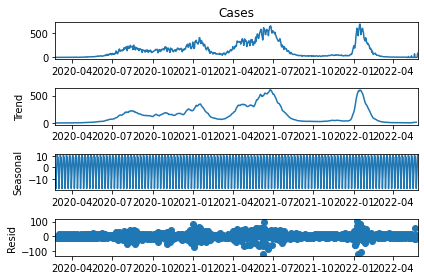

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

s_dec_cases = seasonal_decompose(covid_df.Cases, model = "adittive")

s_dec_cases.plot()
plt.show()

### Machine Learning Time Series Method
Using machine learning we can find other kind of relations more than just those 3 and also we can include other time series variables (in this case media cloud) or we could even include non time series variables.

### 3.2.2. Prepare data to supervised learning time series (function to create sliding window)

we will use:

* data: is the dataframe in our case (Covid Cases + Media CloudData)
* n_in: is the number of lag weeks in the past (length of window)

The heart of this "series_to_supervised" function is the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html">shift</a> fuction of pandas

This function gets as input the number of periods (in this case the number of days represented as rows up or down in the dataframe) to move the columns of a dataframe. E.g.

- If we have df.shift(1) all the rows will move one row down
- If we have df.shift(-1) all the rows will move one row up

In [9]:
# prepare data for lstm

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


### 3.2.3. normalize features
As we are working with a Neural Network the data values ​​must be normalized to help backpropagation algorithm So we will use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">MinMaxScaler</a> from sklearn

In [10]:
def normalize_features(df, normalize_y=True, feature_range=(0, 1)):
    # Take features and labels
    x = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    
    # add one dimension to y to be (n_instances, 1)
    y = np.expand_dims(y.to_numpy(),axis=1)
    
    # Normalize x
    scaler_x = MinMaxScaler(feature_range=feature_range) # Scaler between feature_range. By default 0 and 1
    scaled_x = scaler_x.fit_transform(x)
    
    # Normalize y
    if normalize_y:
        scaler_y = MinMaxScaler(feature_range=feature_range) # Scaler between feature_range. By default 0 and 1
        scaled_y = scaler_y.fit_transform(y)
        scaled = np.concatenate([scaled_x, scaled_y], axis=1)
        return scaled, scaler_y
    else:
        scaled = np.concatenate([scaled_x, y], axis=1)
        return scaled

In [11]:
normalize_y = True
feature_range = (-1, 1)

#scaled = normalize_features(df=covid_df, normalize_y=normalize_y, feature_range=feature_range)
scaled, scaler_y = normalize_features(df=covid_df, normalize_y=normalize_y, feature_range=feature_range)

# length of window
days = 7

# frame as supervised learning
data = series_to_supervised(scaled, n_in=days)
DataFrame(data)

,var1(t-7),var2(t-7),var1(t-6),var2(t-6),var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
7,-0.642447,-1.000000,-0.690224,-1.000000,-0.631544,-1.000000,-0.590219,-1.000000,-0.623381,-1.000000,-0.544727,-1.0,-0.595424,-1.0,-0.559750,-1.000000
8,-0.690224,-1.000000,-0.631544,-1.000000,-0.590219,-1.000000,-0.623381,-1.000000,-0.544727,-1.000000,-0.595424,-1.0,-0.559750,-1.0,-0.480629,-1.000000
9,-0.631544,-1.000000,-0.590219,-1.000000,-0.623381,-1.000000,-0.544727,-1.000000,-0.595424,-1.000000,-0.559750,-1.0,-0.480629,-1.0,-0.471170,-1.000000
10,-0.590219,-1.000000,-0.623381,-1.000000,-0.544727,-1.000000,-0.595424,-1.000000,-0.559750,-1.000000,-0.480629,-1.0,-0.471170,-1.0,-0.452454,-1.000000
11,-0.623381,-1.000000,-0.544727,-1.000000,-0.595424,-1.000000,-0.559750,-1.000000,-0.480629,-1.000000,-0.471170,-1.0,-0.452454,-1.0,-0.542511,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,-0.588588,-1.000000,-0.574324,-1.000000,-0.542336,-1.000000,-0.462359,-1.000000,0.279111,-0.786648,-0.400056,-1.0,-0.498430,-1.0,-0.598683,-1.000000
820,-0.574324,-1.000000,-0.542336,-1.000000,-0.462359,-1.000000,0.279111,-0.786648,-0.400056,-1.000000,-0.498430,-1.0,-0.598683,-1.0,-0.512504,-1.000000
821,-0.542336,-1.000000,-0.462359,-1.000000,0.279111,-0.786648,-0.400056,-1.000000,-0.498430,-1.000000,-0.598683,-1.0,-0.512504,-1.0,-0.527456,-1.000000
822,-0.462359,-1.000000,0.279111,-0.786648,-0.400056,-1.000000,-0.498430,-1.000000,-0.598683,-1.000000,-0.512504,-1.0,-0.527456,-1.0,-0.421308,-1.000000


### 3.2.4 Features Set

In [12]:
# We define the number of features as (Cases and media cloud)
n_features = scaled.shape[1]

# The features to train the model will be all except the values of the actual week 
# We can't use other variables in week t because whe need to resample a a 3D Array
features_set = DataFrame(data.values[:,:-n_features])
# Convert pandas data frame to np.array to reshape as 3D Array
features_set = features_set.to_numpy()
features_set.shape

(817, 14)

### 3.2.5. Labels Set

In [13]:
# We will use Dengue cases in last week 
labels_set = DataFrame(data.values[:,-1])
# Convert pandas data frame to np.array
labels_set = labels_set.to_numpy()
labels_set.shape

(817, 1)

### 3.2.6. Train Test split

In [14]:
# We need a sequence so we can't split randomly
# To divide into Train (90%) and test (10%) to do that we need to know the 90% of the total dataframe
size = features_set.shape[0]
split = int(size*(9/10))

#### Train

In [15]:
# We will train with 1st 90% of data and test with last 10%
train_X = features_set[:split] ##90% train
train_y = labels_set[:split]  ##90% train

#### Test

In [16]:
test_X = features_set[split:] ##10% test
test_y = labels_set[split:] ##10% test

### 3.2.7. Reshape to tensor

As we will use an LSTM the input is given as a 3D tensor of shape:
* features shape: `(n_instances, sliding_window_length, input_variables)`
* Labels shape: `(n_instances, n_output_labels (one week ahead this case = 1))`

In [17]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], days, n_features))
test_X = test_X.reshape((test_X.shape[0], days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(735, 7, 2) (735, 1) (82, 7, 2) (82, 1)


# 4. Modeling

## 4.1. Define the Model

We define the:
* Model architecture. In this case, the model is an LSTM neural network.
* Model Loss function. In this case as we are in a regression task, we will use Mean Absolute Error (MAE).
* Model optimizer. In this case for speed of convergence we will use the adam optimizer.

In [18]:
# Set Seed
tf.random.set_seed(0)

# design network
model = Sequential()
model.add(LSTM(120, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(240, input_shape=(train_X.shape[1], 120)))
model.add(Dense(60))
model.add(Dense(1))

# Compile the model
model.compile(loss='mae', optimizer='adam')

# Print the model
model.summary()

Metal device set to: Apple M1


2022-07-11 09:41:46.905956: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-11 09:41:46.906351: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 120)            59040     
                                                                 
 lstm_1 (LSTM)               (None, 240)               346560    
                                                                 
 dense (Dense)               (None, 60)                14460     
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 420,121
Trainable params: 420,121
Non-trainable params: 0
_________________________________________________________________


## 4.2. Train the model

In [19]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50


2022-07-11 09:41:47.424814: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-11 09:41:48.567289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-11 09:41:48.777550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-11 09:41:48.847282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-11 09:41:48.944660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-11 09:41:49.059987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 - 2s - loss: 0.3122 - val_loss: 0.3943 - 2s/epoch - 207ms/step
Epoch 2/50


2022-07-11 09:41:49.580704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-11 09:41:49.647714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-11 09:41:49.674066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 - 0s - loss: 0.1217 - val_loss: 0.0832 - 142ms/epoch - 13ms/step
Epoch 3/50
11/11 - 0s - loss: 0.2575 - val_loss: 0.3174 - 152ms/epoch - 14ms/step
Epoch 4/50
11/11 - 0s - loss: 0.1759 - val_loss: 0.0635 - 141ms/epoch - 13ms/step
Epoch 5/50
11/11 - 0s - loss: 0.0997 - val_loss: 0.1122 - 141ms/epoch - 13ms/step
Epoch 6/50
11/11 - 0s - loss: 0.1647 - val_loss: 0.0651 - 142ms/epoch - 13ms/step
Epoch 7/50
11/11 - 0s - loss: 0.1602 - val_loss: 0.0785 - 145ms/epoch - 13ms/step
Epoch 8/50
11/11 - 0s - loss: 0.1281 - val_loss: 0.0776 - 136ms/epoch - 12ms/step
Epoch 9/50
11/11 - 0s - loss: 0.1395 - val_loss: 0.1346 - 142ms/epoch - 13ms/step
Epoch 10/50
11/11 - 0s - loss: 0.1371 - val_loss: 0.0484 - 145ms/epoch - 13ms/step
Epoch 11/50
11/11 - 0s - loss: 0.0845 - val_loss: 0.0586 - 138ms/epoch - 13ms/step
Epoch 12/50
11/11 - 0s - loss: 0.1218 - val_loss: 0.0646 - 144ms/epoch - 13ms/step
Epoch 13/50
11/11 - 0s - loss: 0.1585 - val_loss: 0.0317 - 145ms/epoch - 13ms/step
Epoch 14/50
11/11 - 0s 

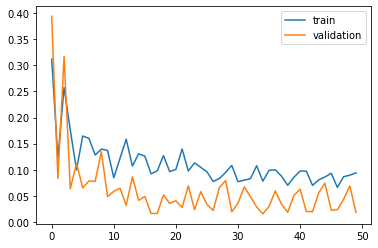

In [20]:
from matplotlib import pyplot
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

# 5. Test the model

## 5.1. Predict test output using the model and unnormalize the otput data

In [21]:
from math import sqrt
from numpy import concatenate

def test_model(model, test_X, test_y, normalize_y):
    
    # do the prediction
    yhat = model.predict(test_X)
    
    # Invert scaling for forecast
    # Inverse Scaler
    if normalize_y:       
        #test_y = test_y.reshape((len(test_y), 1))
        inv_yhat = scaler_y.inverse_transform(yhat)
        inv_y = scaler_y.inverse_transform(test_y)
    else:
        inv_yhat = yhat 
        inv_y = test_y
    
    return inv_yhat, inv_y

In [22]:
inv_yhat, inv_y = test_model(model=model, test_X=test_X, test_y=test_y, normalize_y=normalize_y)

2022-07-11 09:41:57.268085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-11 09:41:57.330565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-11 09:41:57.356921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## 5.2. Error functions

### Mean Absolute Percentage Error (MAPE)

MAPE has a problem if there are ceros in the test data, so other metrics can be explored

In [23]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [24]:
# calculate MAPE
mape = mean_absolute_percentage_error(inv_y, inv_yhat)
print('Test MAPE: %.3f' % mape)

Test MAPE: inf


/var/folders/4w/k6c16td51cv9ytcmnnvx3mpw0000gn/T/ipykernel_36317/4111968303.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


### Mean Absoulte Error (MAE)

In [25]:
from sklearn.metrics import  mean_absolute_error

# calculate MAE
mae = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.3f' % mae)

Test MAE: 6.310


## 5.3. Plot predicted vs actual covid cases

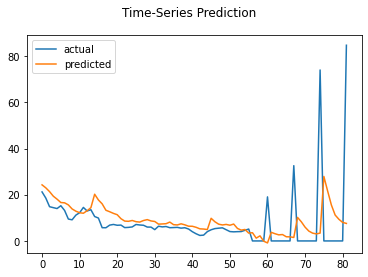

In [26]:
data_predict = inv_yhat  ## predicted target  cases
dataY_plot = inv_y  ##  real test-target cases

data_predict = data_predict.reshape(len(data_predict), 1)
dataY_plot = dataY_plot.reshape(len(dataY_plot), 1)

plt.plot(dataY_plot, label = 'actual')
plt.plot(data_predict, label = 'predicted')
plt.legend(loc="upper left")

plt.suptitle('Time-Series Prediction')
plt.show()